In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')


from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [2]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10) # StratifiedKFold

In [3]:
scores.mean()

0.9473429951690822

In [4]:
C_range_exp = np.linspace(start=-15, stop=20, num=36)
C_range = 10 ** C_range_exp
print(C_range)

[1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06
 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14
 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19 1.e+20]


In [5]:
all_scores_mean = []
all_scores_std  = []

for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train, y_train, cv=10) # StratifiedKFold
    
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

In [6]:
all_scores_mean = np.array(all_scores_mean)
all_scores_std  = np.array(all_scores_std)

Text(0.5, 1.0, 'Accuracy for different values of C')

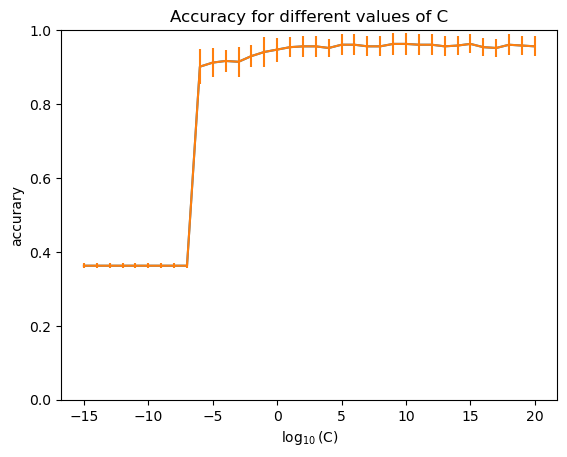

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C_range_exp, all_scores_mean)

plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)

plt.ylim(0,1)
plt.ylabel('accurary')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [8]:
all_scores_mean.max()

0.9627053140096619

In [9]:
max_index = np.argmax(all_scores_mean)

In [10]:
C_range_exp[max_index]

9.0

In [11]:
clf.C = 10 ** C_range_exp[max_index]

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, solver='liblinear')

In [13]:
clf.score(X_test, y_test)

0.956140350877193

In [14]:
clf = linear_model.LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193